In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

### Plotting a Mixture of Normals
The whole reason that we use plotting software is to visualize the data that we are working with, so let’s do that. We provide you two files, which store resulting data from an experiment. 

   The file ``points.dlm`` is a tab-delimited file (**.dlm** stands for “delimited”). Such a format is common when writing reasonably small files, and is useful if you expect to use a data set across different programs or platforms. See the documentation for the command [numpy.loadtxt](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html) to see how to read this file. The file ``labels.npy`` is a numpy binary file, representing a numpy object. The **.npy** file format is specific to numpy. Many languages (e.g., R and MATLAB) have their own such language-specific file formats for saving variables, workspaces, etc. 
   
   These formats tend to be more space-efficient, typically at the cost of program-dependence. It is best to avoid such files if you expect to deal with the same data set in several different environments (e.g., you run experiments in MATLAB and do your statistical analysis in R). .npy files are opened using [numpy.load](https://numpy.org/doc/stable/reference/generated/numpy.load.html).

   The observations in my experiment were generated from a distribution that is approximately normal, but not precisely so. Let’s explore how well the normal approximation holds.

1.  **Read the two files into numpy.** Please include both ``labels.npy`` and ``points.dlm`` in your homework submission.  
    The former of these should yield a numpy array of 0s and 1s, and the latter should yield a 100-by-2 numpy array, in which each row corresponds to a 2-dimensional point.  
    The i-th entry of the array in labels.npy corresponds to the cluster membership label of the i-th row of the matrix stored in points.dlm.

In [2]:
labels = np.load('labels.npy')
print("Labels array:")
print(labels)
print(f"Shape of labels array: {labels.shape}")
points = np.loadtxt('points.dlm', delimiter='\t')
print("\nPoints array:")
print(points)
print(f"Shape of points array: {points.shape}")


Labels array:
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1.
 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 1. 1. 1.]
Shape of labels array: (100,)

Points array:
[[0.4579593  0.54352873]
 [0.08891206 0.76618616]
 [0.1464601  0.78467006]
 [0.64990065 0.19183258]
 [0.57086316 0.40393525]
 [0.29572486 0.58500418]
 [0.15027556 0.80593204]
 [0.25960085 0.67009997]
 [0.47471736 0.34099282]
 [0.43924813 0.48635789]
 [0.49324641 0.2586415 ]
 [0.57028107 0.50604562]
 [0.35078376 0.47766205]
 [0.70058495 0.28676208]
 [0.58608077 0.43146247]
 [0.31866683 0.53642412]
 [0.31731621 0.68709491]
 [0.24563737 0.58151459]
 [0.5904017  0.3461213 ]
 [0.58237811 0.33313413]
 [0.19892317 0.67976276]
 [0.57546381 0.35036447]
 [0.46371709 0.5295031 ]
 [0.32796263 0.45138817]
 [0.6607364  0.44828526]
 [0.462723

2. **Generate a scatter plot of the data.** Each data point should appear as an x (often called a cross in data visualization packages), colored according to its cluster membership as given by points.npy. The points with cluster label 0 should be colored blue, and those with cluster label 1 should be colored red. Set the x and y axes to both range from 0 to 1. Adjust the size of the point markers to what you believe to be reasonable (i.e., aesthetically pleasing, visible, etc).


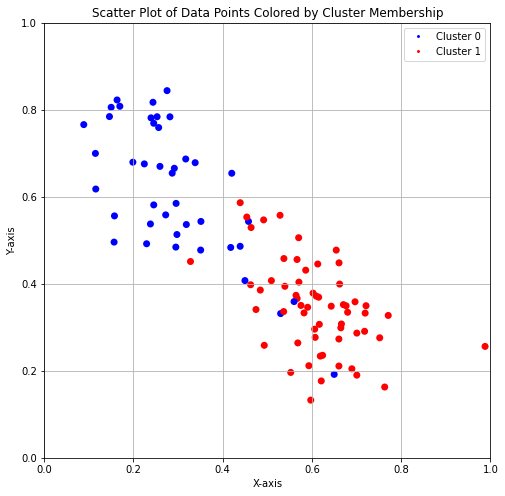

In [3]:
# subsetting data to cluster 0 and 1
from matplotlib.lines import Line2D
color_map = {0: 'blue', 1: 'red'}
colors = [color_map[label] for label in labels]
plt.figure(figsize=(8, 8))
plt.scatter(points[:, 0], points[:, 1],
            c=colors,
            marker='.',
            s=100,
            linewidths=2)

# set the x and y axes limits from 0 to 1
plt.xlim(0, 1)
plt.ylim(0, 1)

# add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of Data Points Colored by Cluster Membership')

legend_elements = [Line2D([0], [0], marker=".", color='w', label='Cluster 0',
                          markerfacecolor='blue', markersize=10, markeredgewidth=2),
                   Line2D([0], [0], marker=".", color='w', label='Cluster 1',
                          markerfacecolor='red', markersize=10, markeredgewidth=2)]
plt.legend(handles=legend_elements, loc='upper right')

plt.grid(True)
plt.show()


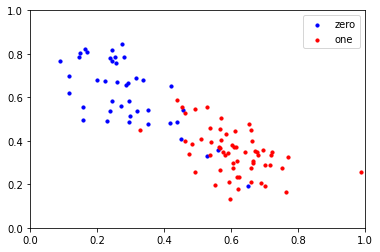

3. Theoretically, the data should approximate a mixture of normals with means and covariance matrices given by
$$ \mu_{0} = (0.2, 0.7)^{T}, \Sigma_{0} = \begin{bmatrix}0.015 & -0.011 \\ -0.011 & 0.018\end{bmatrix} $$
$$ \mu_{1} = (0.65, 0.3)^{T}, \Sigma_{1} = \begin{bmatrix}0.016 & -0.011 \\ -0.011 & 0.016\end{bmatrix} $$
**For each of these two normal distributions, add two contour lines corresponding to 1 and 2 "standard deviations" of the distribution.**   
We will take the 1-standard deviation contour to be the level set (which is an ellipse) of the normal distribution that encloses probability mass 0.68 of the distribution, and the 2-standard deviation contour to be the level set that encloses probability mass 0.95 of the distribution.   

   The contour lines for cluster 0 should be colored blue, and the lines for cluster 1 should be colored red. The contour lines will go off the edge of the 1-by-1 square that we have plotted. Do not worry about that. 

   Hint: these ellipses are really just confidence regions given by
   $$ (x-\mu)^{T}\Sigma^{-1}(x-\mu)\leqslant X_{2}^{2}(p)$$
   
   where $p$ is a probability and $X^{2}_{d}$ is the quantile function for the $X^{2}$ distribution with $d$ degrees of freedom. 
   
   Hint: use the optional argument <span style="font-family:Courier; font-size:1em;">levels</span> for the [pyplot.contour](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html) function.

In [4]:
from scipy.stats import chi2
mu_0 = np.array([0.2, 0.7])
Sigma_0 = np.array([[0.015, -0.011],
                    [-0.011, 0.018]])

mu_1 = np.array([0.65, 0.3])
Sigma_1 = np.array([[0.016, -0.011],
                    [-0.011, 0.016]])
d = 2
prob_levels = [0.68, 0.95]

# compute chi-squared quantiles for the given probabilities
chi2_levels = chi2.ppf(prob_levels, df=d)
print("Chi-squared levels:", chi2_levels)



Chi-squared levels: [2.27886857 5.99146455]


In [5]:
# find chi-square score
from scipy.stats import chi2


array([2.27886857, 5.99146455])

In [5]:
from scipy import linalg
# create a grid of points
x = np.linspace(0, 1, 500)
y = np.linspace(0, 1, 500)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))
def mahalanobis(pos, mu, Sigma_inv):
    delta = pos - mu
    return np.einsum('...k,kl,...l->...', delta, Sigma_inv, delta)
# invert covariance matrices
Sigma_0_inv = np.linalg.inv(Sigma_0)
Sigma_1_inv = np.linalg.inv(Sigma_1)
print(f'Sigma_0_inv = {Sigma_0_inv}')
print(f'Sigma_1_inv= {Sigma_1_inv}')
# compute Mahalanobis distance squared for each grid point
Z0 = mahalanobis(pos, mu_0, Sigma_0_inv)
Z1 = mahalanobis(pos, mu_1, Sigma_1_inv)

Sigma_0_inv = [[120.80536913  73.82550336]
 [ 73.82550336 100.67114094]]
Sigma_1_inv= [[118.51851852  81.48148148]
 [ 81.48148148 118.51851852]]


In [23]:
# find mu0, mu1, sigma0, sigma1
from scipy import linalg
mu_0 = np.array([0.2, 0.7])
Sigma_0 = np.array([[0.015, -0.011],
                    [-0.011, 0.018]])
mu_1 = np.array([0.65, 0.3])
Sigma_1 = np.array([[0.016, -0.011],
                    [-0.011, 0.016]])

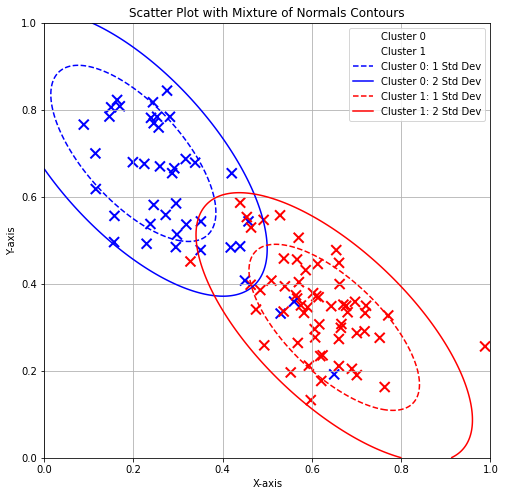

In [6]:
plt.figure(figsize=(8, 8))
plt.scatter(points[:, 0], points[:, 1],
            c=colors,
            marker='x',
            s=100,
            linewidths=2,
            label='Data Points')

# plot contour lines for Cluster 0
contours0 = plt.contour(X, Y, Z0, levels=chi2_levels, colors='blue', linestyles=['--', '-'])
contours0.collections[0].set_label('Cluster 0: 1 Std Dev')
contours0.collections[1].set_label('Cluster 0: 2 Std Dev')

# plot contour lines for Cluster 1
contours1 = plt.contour(X, Y, Z1, levels=chi2_levels, colors='red', linestyles=['--', '-'])
contours1.collections[0].set_label('Cluster 1: 1 Std Dev')
contours1.collections[1].set_label('Cluster 1: 2 Std Dev')

# set the x and y axes limits from 0 to 1
plt.xlim(0, 1)
plt.ylim(0, 1)

# add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Mixture of Normals Contours')

legend_elements = [
    Line2D([0], [0], marker='x', color='w', label='Cluster 0',
           markerfacecolor='blue', markersize=10, markeredgewidth=2),
    Line2D([0], [0], marker='x', color='w', label='Cluster 1',
           markerfacecolor='red', markersize=10, markeredgewidth=2),
    Line2D([0], [0], linestyle='--', color='blue', label='Cluster 0: 1 Std Dev'),
    Line2D([0], [0], linestyle='-', color='blue', label='Cluster 0: 2 Std Dev'),
    Line2D([0], [0], linestyle='--', color='red', label='Cluster 1: 1 Std Dev'),
    Line2D([0], [0], linestyle='-', color='red', label='Cluster 1: 2 Std Dev')
]
plt.legend(handles=legend_elements, loc='upper right')

plt.grid(True)

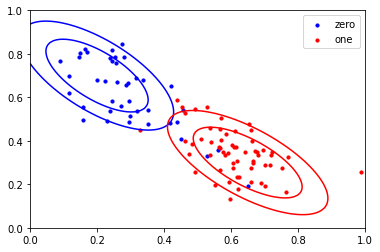

4. Do the data appear normal? There should be at least one obvious outlier. **Add an annotation to your figure indicating one or more such outlier(s).** E.g., one outlier exist in the red zone.

Number of outliers detected: 5



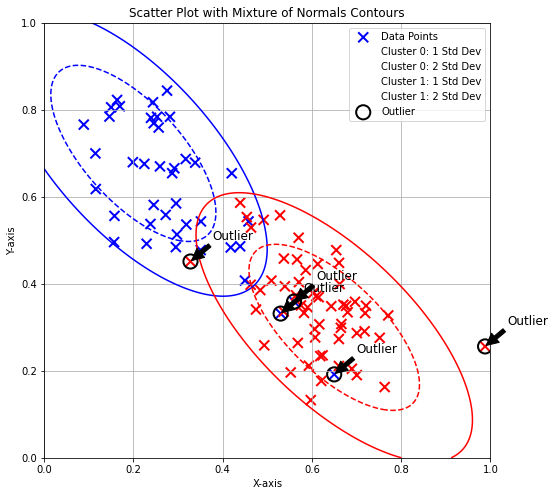

In [20]:
# create the scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(points[:, 0], points[:, 1],
            c=colors,
            marker='x',
            s=100,
            linewidths=2,
            label='Data Points')

# plot contour lines for Cluster 0
contours0 = plt.contour(X, Y, Z0, levels=chi2_levels, colors='blue', linestyles=['--', '-'])
contours0.collections[0].set_label('Cluster 0: 1 Std Dev')
contours0.collections[1].set_label('Cluster 0: 2 Std Dev')

# plot contour lines for Cluster 1
contours1 = plt.contour(X, Y, Z1, levels=chi2_levels, colors='red', linestyles=['--', '-'])
contours1.collections[0].set_label('Cluster 1: 1 Std Dev')
contours1.collections[1].set_label('Cluster 1: 2 Std Dev')

# set the x and y axes limits from 0 to 1
plt.xlim(0, 1)
plt.ylim(0, 1)

# add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Mixture of Normals Contours')

# Create a custom legend
legend_elements = [
    Line2D([0], [0], marker='x', color='w', label='Cluster 0',
           markerfacecolor='blue', markersize=10, markeredgewidth=2),
    Line2D([0], [0], marker='x', color='w', label='Cluster 1',
           markerfacecolor='red', markersize=10, markeredgewidth=2),
    Line2D([0], [0], linestyle='--', color='blue', label='Cluster 0: 1 Std Dev'),
    Line2D([0], [0], linestyle='-', color='blue', label='Cluster 0: 2 Std Dev'),
    Line2D([0], [0], linestyle='--', color='red', label='Cluster 1: 1 Std Dev'),
    Line2D([0], [0], linestyle='-', color='red', label='Cluster 1: 2 Std Dev')
]
plt.legend(handles=legend_elements, loc='upper right')

# Add grid
plt.grid(True)
# Function to compute Mahalanobis distance squared for each point based on its cluster
def compute_mahalanobis_distance(point, mu, Sigma_inv):
    delta = point - mu
    return delta.T @ Sigma_inv @ delta

# compute Mahalanobis distances for each point
mahalanobis_distances = np.zeros(points.shape[0])

for i in range(points.shape[0]):
    if labels[i] == 0:
        mahalanobis_distances[i] = compute_mahalanobis_distance(points[i], mu_0, Sigma_0_inv)
    else:
        mahalanobis_distances[i] = compute_mahalanobis_distance(points[i], mu_1, Sigma_1_inv)

# define threshold for outliers (2 standard deviations, chi-squared level for 95% confidence)
threshold = chi2_levels[1]  # 5.99146455

# identify outliers: points with Mahalanobis distance squared > threshold
outlier_indices = np.where(mahalanobis_distances > threshold)[0]
print(f"Number of outliers detected: {len(outlier_indices)}\n")

# mark every outlier on the plot
for idx in outlier_indices:
    outlier_point = points[idx]
    cluster_label = labels[idx]
    cluster_color = color_map[cluster_label]
    
    # highlight outlier with a distinct marker (e.g., large black circle)
    plt.scatter(outlier_point[0], outlier_point[1],
                facecolors='none', edgecolors='black',
                marker='o', s=200, linewidths=2,
                label='Outlier' if idx == outlier_indices[0] else "")
    
    # mark outlier with an arrow and label
    plt.annotate('Outlier',
                 xy=(outlier_point[0], outlier_point[1]),
                 xytext=(outlier_point[0]+0.05, outlier_point[1]+0.05),
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 fontsize=12,
                 color='black')

# to avoid duplicate labels in legend
handles, labels_legend = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels_legend, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper right')

plt.show()

Text(1.2, 0.2, 'outlier')

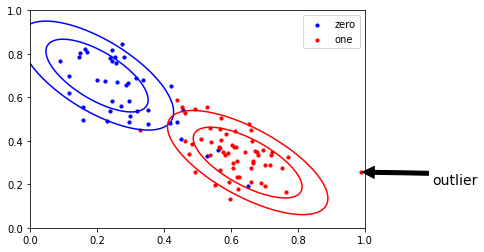